In [1]:
import optuna 

/home/ramon/miniconda3/envs/kidney20/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
study = optuna.create_study(
            study_name='debias_param_search',
            storage='sqlite:///debias_param_search.db',
            directions=["minimize","maximize"],
            load_if_exists=True)

[I 2023-05-29 12:47:49,147] Using an existing study with name 'debias_param_search' instead of creating a new one.


In [3]:
study.trials

[FrozenTrial(number=0, values=[0.600490391254425, 0.5206856727600098], datetime_start=datetime.datetime(2023, 5, 29, 12, 14, 13, 840039), datetime_complete=datetime.datetime(2023, 5, 29, 12, 21, 56, 826399), params={'batch_size': 32, 'lambda': 0.13184575665203835, 'lr': 0.0006483636572921401, 'optimizer': 'SGD', 'patience': 6, 'platau_factor': 0.01, 'scheduler': 'ReduceLROnPlateau'}, distributions={'batch_size': IntUniformDistribution(high=64, low=16, step=4), 'lambda': UniformDistribution(high=1.0, low=0.01), 'lr': LogUniformDistribution(high=0.1, low=1e-05), 'optimizer': CategoricalDistribution(choices=('SGD', 'Adam', 'AdamW')), 'patience': IntUniformDistribution(high=10, low=2, step=2), 'platau_factor': DiscreteUniformDistribution(high=0.09, low=0.01, q=0.02), 'scheduler': CategoricalDistribution(choices=('ReduceLROnPlateau', 'StepLR'))}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None),
 FrozenTrial(numb

TypeError: cannot unpack non-iterable NoneType object

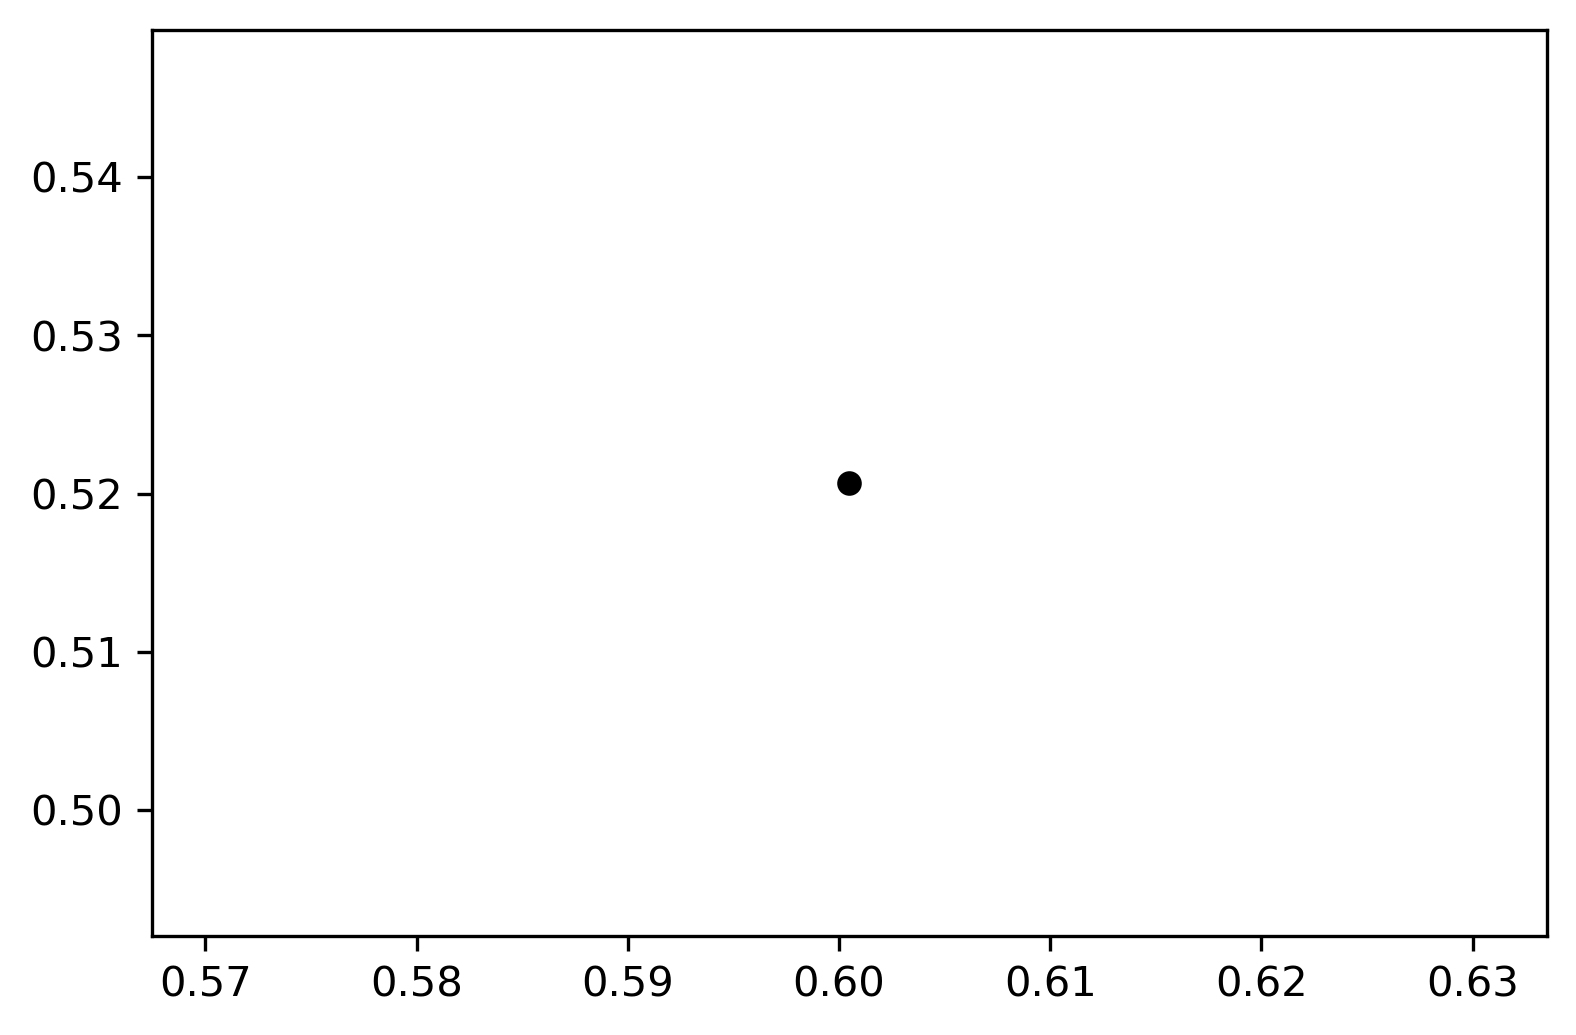

In [4]:
import matplotlib.pyplot as plt 
plt.figure(0,dpi=300)
for e in study.trials:
    task_loss,demo_loss = e.values
    plt.scatter(task_loss,demo_loss, 24,'k')
plt.xlabel('Task Loss (NLL)')
plt.ylabel('Demographic Loss (NLL)')
plt.title("Task Loss Vs Demographic Loss")

In [ ]:
study.trials[0]

TypeError: cannot unpack non-iterable NoneType object

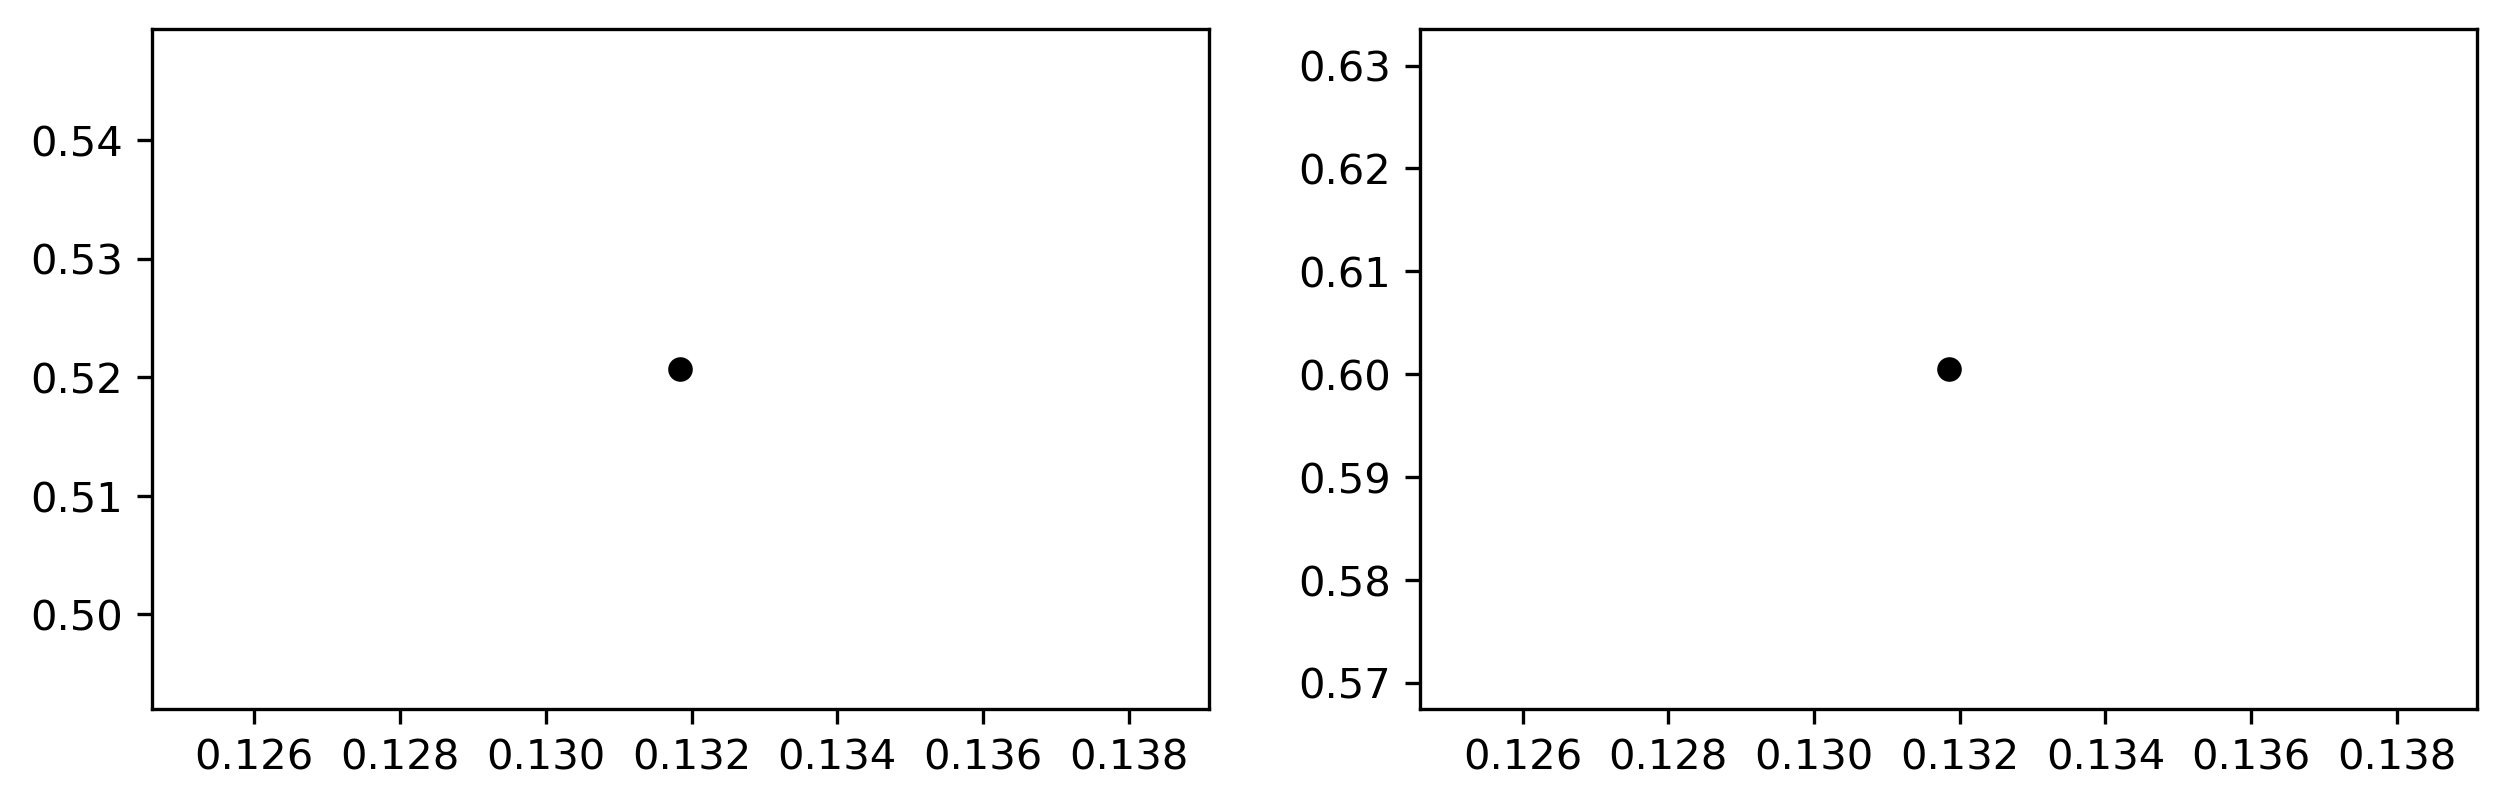

In [5]:
fig,ax= plt.subplots(1,2,dpi=300,figsize=(10,3))
for e in study.trials:
    task_loss,demo_loss = e.values 
    lmbd = e.params['lambda']
    ax[0].scatter(lmbd,demo_loss, 24,'k')
    ax[1].scatter(lmbd,task_loss, 24,'k')
ax[0].set_xlabel('Lambda )')
ax[0].set_ylabel('Demographic Loss (NLL)')
ax[1].set_xlabel('Lambda )')
ax[1].set_ylabel('Task Loss (NLL)')

In [6]:
e

FrozenTrial(number=1, values=None, datetime_start=datetime.datetime(2023, 5, 29, 12, 21, 56, 847164), datetime_complete=datetime.datetime(2023, 5, 29, 12, 22, 2, 518307), params={'batch_size': 60, 'lambda': 0.9960012791547929, 'lr': 6.822737882008439e-05, 'lr_step': 9, 'optimizer': 'SGD', 'scheduler': 'StepLR'}, distributions={'batch_size': IntUniformDistribution(high=64, low=16, step=4), 'lambda': UniformDistribution(high=1.0, low=0.01), 'lr': LogUniformDistribution(high=0.1, low=1e-05), 'lr_step': IntUniformDistribution(high=9, low=5, step=2), 'optimizer': CategoricalDistribution(choices=('SGD', 'Adam', 'AdamW')), 'scheduler': CategoricalDistribution(choices=('ReduceLROnPlateau', 'StepLR'))}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, trial_id=2, state=TrialState.PRUNED, value=None)

In [7]:
from optuna.trial import TrialState
import pandas as pd 

In [8]:
df_rows = list() 
for e in study.trials:
    if e.state == TrialState.COMPLETE: 
        task_loss,demo_loss = e.values 
        lmbd = e.params['lambda']
        trial_id =  e._trial_id
        df_rows.append([lmbd,task_loss,demo_loss,trial_id])
sample = pd.DataFrame(df_rows,columns=['lambda','taskLoss','demoLoss',"trial_id"]) 

In [24]:
sample['ratio'] = sample['demoLoss']/sample['taskLoss']
sample = sample.sort_values(by='ratio',ascending=False)
sample = sample[sample['taskLoss']<1]

In [10]:
sample

,lambda,taskLoss,demoLoss,trial_id
0,0.131846,0.600490,0.520686,1
1,0.867170,0.704648,0.581634,3
2,0.508237,143.251572,398.148834,4


In [ ]:
import pandas as pd 

sample = pd.DataFrame({'lambda':[],'taskLoss':[],'demoLoss':[]})
pd.concat([sample,{'lambda':0,'taskLoss':10,'demoLoss':20}])

In [11]:
sample

,lambda,taskLoss,demoLoss,trial_id
0,0.131846,0.600490,0.520686,1
1,0.867170,0.704648,0.581634,3
2,0.508237,143.251572,398.148834,4


In [12]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [13]:
import IPython 
IPython.__version__

'8.3.0'

In [14]:
len(study.best_trials)

3

In [17]:
study.best_trials[0].params

{'batch_size': 32,
 'lambda': 0.13184575665203835,
 'lr': 0.0006483636572921401,
 'optimizer': 'SGD',
 'patience': 6,
 'platau_factor': 0.01,
 'scheduler': 'ReduceLROnPlateau'}